In [51]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


sns.set(style='whitegrid')

In [52]:
# Connecting to the SQLite database
db_path = 'db_2_SPb_realty.sqlite'
conn = sqlite3.connect(db_path)

query = """SELECT name FROM sqlite_master WHERE type='table';
"""
pd.read_sql(query, conn)

,name
0,real_estate_data
1,cities
2,cl


In [53]:
def preview(table_name):
    conn = sqlite3.connect('db_2_SPb_realty.sqlite')
    query = f"""SELECT * FROM {table_name} LIMIT 5"""

    return pd.read_sql(query, conn)

In [54]:
preview('cities')

,city_name,population,airports,avg_income
0,посёлок Шушары,10000,1,25000
1,городской посёлок Янино-1,15000,0,28000
2,посёлок Парголово,8000,1,22000
3,посёлок Мурино,12000,0,26000
4,Ломоносов,20000,1,30000


In [55]:
preview('cl')

,client_id,FIO,Region,account_num
0,A,Иванов,Москва,111
1,A,Иванов,Москва,222
2,B,Петров,Иваново,333
3,C,Сидоров,Москва,444


In [56]:
preview('real_estate_data')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,None,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,None,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,None,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,None,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,None,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [57]:
query = "PRAGMA table_info(real_estate_data)"
pd.read_sql(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,total_images,INTEGER,0,None,0
1,1,last_price,REAL,0,None,0
2,2,total_area,REAL,0,None,0
3,3,first_day_exposition,TEXT,0,None,0
4,4,rooms,INTEGER,0,None,0
5,5,ceiling_height,REAL,0,None,0
6,6,floors_total,REAL,0,None,0
7,7,living_area,REAL,0,None,0
8,8,floor,INTEGER,0,None,0
9,9,is_apartment,TEXT,0,None,0


#### 1. Посчитать общую площадь и количество комнат (rooms) для каждого этажа (floor)

In [58]:
query = """
    SELECT 
        floor,
        SUM(total_area) as total_area_by_floor,
        SUM(rooms) as room_count
    FROM real_estate_data
    GROUP BY
        floor
    ORDER BY
        floor ASC
    LIMIT 5
    """
pd.read_sql(query, conn)

,floor,total_area_by_floor,room_count
0,1,164244.70,6260
1,2,206084.68,7414
2,3,193495.87,6733
3,4,179839.00,6292
4,5,160170.01,5696


#### 2. Найти населенный пункт (locality_name) с наибольшим числом квартир, у которых жилая площадь (living_area) больше 100 кв.м

In [59]:
query = """
    SELECT 
        locality_name,
        COUNT(ROWID) as big_area_appartment_count
    FROM real_estate_data
    WHERE
        total_area > 100
    GROUP BY
        locality_name
    ORDER BY
        big_area_appartment_count DESC
    LIMIT 1
    """
pd.read_sql(query, conn)

,locality_name,big_area_appartment_count
0,Санкт-Петербург,1673


#### 3. Посчитать количество записей по floor, где is_apartment равно 'Yes':

In [60]:
query = """
    SELECT 
       DISTINCT(is_apartment)
    FROM real_estate_data
    LIMIT 5
    """
pd.read_sql(query, conn)

,is_apartment
0,None
1,False
2,True


In [61]:
query = """
    SELECT
        floor,
        COUNT(ROWID) as appartment_count
    FROM real_estate_data
    WHERE
        is_apartment = 'True'
    GROUP BY
        floor
    ORDER BY
        appartment_count DESC
    LIMIT 5
    """
pd.read_sql(query, conn)

,floor,appartment_count
0,3,10
1,2,10
2,1,7
3,4,6
4,5,5


#### 4. Найти наибольшую общую площадь (total_area) и ее соответствующий населенный пункт (locality_name):

In [62]:
query = """
    SELECT
        ROWID as id,
        locality_name,
        MAX(total_area)
    FROM real_estate_data
    LIMIT 5
    """
pd.read_sql(query, conn)

,id,locality_name,MAX(total_area)
0,19541,Санкт-Петербург,900.0


#### 5. Найти квартиры, где общая площадь (total_area) квартир превышает 200 кв.м, и отсортировать их по убыванию площади

In [63]:
query = """
    SELECT
        ROWID as id,
        total_area
    FROM real_estate_data
    WHERE
        total_area > 200
    ORDER BY
        total_area DESC
    LIMIT 5
    """
pd.read_sql(query, conn)

,id,total_area
0,19541,900.0
1,12860,631.2
2,3118,631.0
3,15652,618.0
4,5359,590.0


#### 6. Посчитать среднюю жилую площадь (living_area) для квартир с количеством комнат (rooms) больше 3. средняя цена таких квартир выше или ниже квартир, где комнат меньше трех?

In [64]:
query = """
    SELECT
        AVG(living_area) as avg_living_area,
        round(AVG(last_price)/1000000,2) as avg_price_in_mln
    FROM real_estate_data
    WHERE
        rooms > 3
    """
pd.read_sql(query, conn)

,avg_living_area,avg_price_in_mln
0,82.890409,18.55


In [65]:
query = """
    SELECT
        AVG(living_area) as avg_living_area,
        round(AVG(last_price)/1000000,2) as avg_price_in_mln
    FROM real_estate_data
    WHERE
        rooms < 3
    """
pd.read_sql(query, conn)

,avg_living_area,avg_price_in_mln
0,24.699129,4.69


In [66]:
query = """
    SELECT
        ROWID,
        rooms,
        round(last_price/1000000,2) as avg_price_in_mln
    FROM real_estate_data
    """
price =  pd.read_sql(query, conn)
price.head()

,rowid,rooms,avg_price_in_mln
0,1,3,13.00
1,2,1,3.35
2,3,2,5.20
3,4,3,64.90
4,5,2,10.00


Text(0, 0.5, 'Frequency')

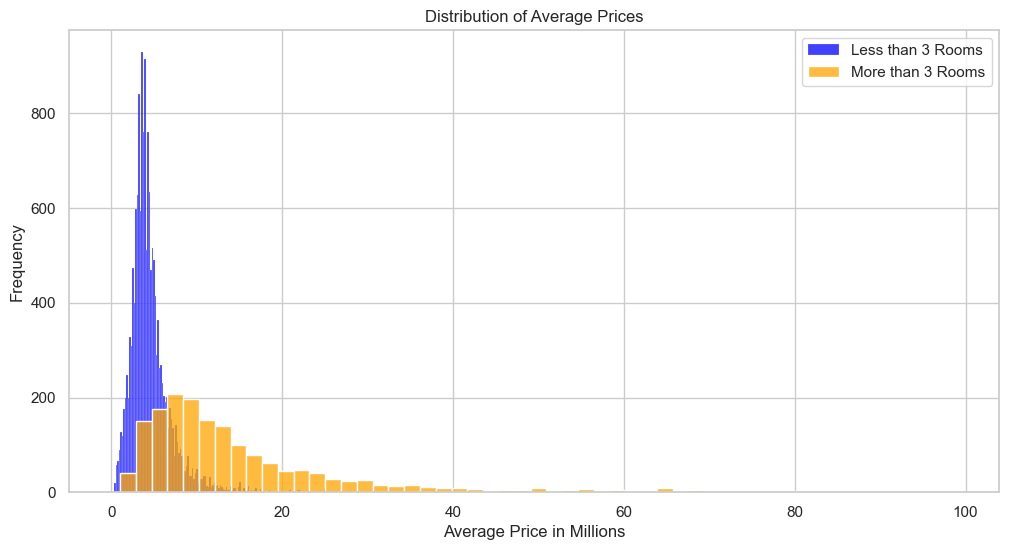

In [67]:
less_than_3_rooms = price[(price['avg_price_in_mln'] < 100) & (price['rooms'] < 3)]
more_than_3_rooms = price[(price['avg_price_in_mln'] < 100) & (price['rooms'] > 3)]

plt.figure(figsize=(12, 6))


sns.histplot(less_than_3_rooms['avg_price_in_mln'], color='blue', label='Less than 3 Rooms')

sns.histplot(more_than_3_rooms['avg_price_in_mln'], color='orange', label='More than 3 Rooms')

plt.legend()
plt.title('Distribution of Average Prices')
plt.xlabel('Average Price in Millions')
plt.ylabel('Frequency')

#### 7. Сколько населенных пунктов (locality_name) с количеством квартир, превышающим 1000? отсортировать по убыванию количества квартир

In [68]:
query = """
    SELECT
        locality_name,
        COUNT(rowid) as appartment_count
    FROM real_estate_data
    GROUP BY
        locality_name
    HAVING
        appartment_count > 1000
    ORDER BY
        appartment_count DESC
    """
pd.read_sql(query, conn)

,locality_name,appartment_count
0,Санкт-Петербург,15721


#### 8. Посчитать количество уникальных населенных пунктов и среднюю жилую площадь (living_area) для квартир, расположенных на разных этажах (поле для группировки - floor)

In [69]:
query = """
    SELECT
        floor,
        AVG(living_area) as avg_living_area,
        COUNT(DISTINCT locality_name) as unique_places
    FROM real_estate_data
    GROUP BY
        floor
    ORDER BY
        floor ASC
    LIMIT 5
    """
pd.read_sql(query, conn)

,floor,avg_living_area,unique_places
0,1,33.489516,232
1,2,36.292895,226
2,3,37.124480,194
3,4,37.800943,177
4,5,35.909822,166


9. Посчитать количество квартир и суммарную общую площадь (total_area) для каждого этажа (floor) и количества этажецй в доме и населенного пункта (locality_name). отсортировать по названию населенного пункта

In [70]:
query = """
    SELECT
        locality_name,
        floor,
        floors_total,
        SUM(total_area) as sum_total_area,
        count(rowid) as appartment_count
    FROM real_estate_data
    GROUP BY
        locality_name,
        floor,
        floors_total
    ORDER BY
        locality_name ASC
    """
pd.read_sql(query, conn)

,locality_name,floor,floors_total,sum_total_area,appartment_count
0,None,1,2.0,71.00,1
1,None,1,3.0,178.30,1
2,None,1,4.0,37.99,1
3,None,1,5.0,111.00,2
4,None,2,2.0,94.50,1
...,...,...,...,...,...
3721,село Русско-Высоцкое,8,10.0,46.50,1
3722,село Русско-Высоцкое,9,10.0,49.00,1
3723,село Старая Ладога,1,2.0,30.00,1
3724,село Старая Ладога,1,3.0,55.00,1



10. Найти населенные пункты (locality_name) с наибольшим разбросом в количестве комнат (rooms) и вывести минимальное, среднее и максимальное количество комнат для каждого населенного пункта:


In [71]:
query = """
    SELECT
        locality_name,
        MIN(rooms) as min_rooms,
        round(AVG(rooms),2) as avg_rooms,
        MAX(rooms) as max_rooms,
        MAX(rooms) - MIN(rooms) as rooms_diff
    FROM real_estate_data
    GROUP BY
        locality_name
    ORDER BY
        rooms_diff DESC
    LIMIT 5
    """
pd.read_sql(query, conn)

,locality_name,min_rooms,avg_rooms,max_rooms,rooms_diff
0,Санкт-Петербург,0,2.17,19,19
1,посёлок Парголово,0,1.61,7,7
2,Колпино,1,2.13,8,7
3,Пушкин,1,2.02,7,6
4,посёлок Шушары,0,1.80,5,5



 11. Вывести только такой населенный пункт, где расположены квартиры из самого высокого дома (вспомни про LIMIT)

In [75]:
query = """
    SELECT
        locality_name
    FROM real_estate_data
    WHERE
        floors_total = (SELECT MAX(floors_total) FROM real_estate_data)
    """
pd.read_sql(query, conn)

,locality_name
0,Кронштадт


In [98]:
query = """
    SELECT
        locality_name
    FROM real_estate_data
    ORDER BY
        floors_total DESC
    LIMIT 1
    """
pd.read_sql(query, conn)

,locality_name
0,Кронштадт




12. Вывести количество квартир в каждом городе (count)


In [79]:
query = """
    SELECT
        locality_name,
        count(rowid) as appartment_count
    FROM real_estate_data
    GROUP BY
        locality_name
    ORDER BY 
        appartment_count DESC
    LIMIT 5
    """
pd.read_sql(query, conn)

,locality_name,appartment_count
0,Санкт-Петербург,15721
1,посёлок Мурино,522
2,посёлок Шушары,440
3,Всеволожск,398
4,Пушкин,369


12. Вывести cреднюю цену продажи, среднюю жилую площадь (living_area) в каждом городе

In [83]:
query = """
    SELECT
        locality_name,
        round(AVG(last_price/100000),2) as avg_price_in_mln,
        AVG(living_area) as avg_living_area
    FROM real_estate_data
    GROUP BY
        locality_name
    """
pd.read_sql(query, conn)

,locality_name,avg_price_in_mln,avg_living_area
0,None,67.45,39.152727
1,Бокситогорск,8.46,31.940000
2,Волосово,19.78,28.332857
3,Волхов,17.40,31.930000
4,Всеволожск,37.89,30.846469
...,...,...,...
360,село Путилово,20.25,29.300000
361,село Рождествено,19.00,25.233333
362,село Русско-Высоцкое,26.89,25.637500
363,село Старая Ладога,14.50,15.800000



13. Вывести количество квартир в каждом городе (count), где этаж выше или равен 5


In [85]:
query = """
    SELECT
	locality_name,
	count(rowid) as appartment_count
FROM 
	real_estate_data
WHERE
     floor > 5
GROUP BY
	locality_name
ORDER BY
    appartment_count DESC
    """
pd.read_sql(query, conn)

,locality_name,appartment_count
0,Санкт-Петербург,6654
1,посёлок Мурино,401
2,посёлок Парголово,237
3,деревня Кудрово,219
4,посёлок Шушары,201
...,...,...
71,деревня Лаврики,1
72,деревня Кузьмолово,1
73,деревня Кальтино,1
74,городской посёлок Рощино,1


14. Вывести cреднюю цену продажи, среднюю жилую площадь (living_area) по этажам (floor), где цена ниже 10 000 000


In [87]:
query = """
    SELECT
	floor,
	round(AVG(last_price/100000),2) as avg_price_in_mln,
    AVG(living_area) as avg_living_area
FROM 
	real_estate_data
WHERE
     last_price < 10000000
GROUP BY
	floor
    """
pd.read_sql(query, conn)

,floor,avg_price_in_mln,avg_living_area
0,1,40.29,31.452904
1,2,44.63,31.384218
2,3,45.81,31.075513
3,4,46.23,31.372100
4,5,43.82,30.821070
5,6,49.71,29.487881
6,7,49.21,28.623741
7,8,48.90,28.867167
8,9,48.75,28.844376
9,10,51.39,27.358600


Посчитать количество квартир и суммарную общую площадь  по этажам дома (floor_total)

In [95]:
query = """
    SELECT
	floors_total,
	COUNT(rowid) app_count,
    SUM(total_area) as sum_total_area
FROM 
	real_estate_data
GROUP BY
	floors_total
LIMIT 10
    """
pd.read_sql(query, conn)

,floors_total,app_count,sum_total_area
0,NaN,86,5378.24
1,1.0,25,1530.30
2,2.0,383,21870.78
3,3.0,668,44848.62
4,4.0,1200,87620.53
5,5.0,5788,331135.47
6,6.0,914,80640.52
7,7.0,592,49874.04
8,8.0,390,32375.47
9,9.0,3761,201236.58
